In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot_average_acc(accuracies, labels, ylim=[0., 1.01], save=False, filename=None):
    n_tasks = len(accuracies[0])
    for i, acc in enumerate(accuracies):
        plt.plot(np.arange(1, n_tasks+1), [acc[k, :].sum()/(k+1) for k in range(n_tasks)], marker='x', label=labels[i])
    plt.ylim(ylim[0], ylim[1])
    plt.ylabel('Accuracy')
    plt.legend()
    plt.xlabel('Time')
    plt.tight_layout() 
    if save:
        plt.savefig(filename)
    plt.show()

In [3]:
def variance_acc(accuracies):
    n_tasks = len(accuracies)
    res = []
    for k in range(1, n_tasks):
        res.append(accuracies[k, :k+1].std().item())
    return res

In [4]:
def plot_variance(list_acc, labels, save=False, filename='', ylim=[0., 0.1]):
    list_variance = []
    for acc in list_acc:
        list_variance.append(variance_acc(acc))
    n_tasks = list_acc[0].shape[0]
    for i, var in enumerate(list_variance):
        plt.plot(np.arange(1, n_tasks), var, label=labels[i], marker='x')
    plt.xlabel('Time')
    plt.ylabel('Standard deviation')
    plt.legend()
    plt.ylim(ylim[0], ylim[1])
    plt.tight_layout()
    if save:
        plt.savefig(filename)
    plt.show()

In [5]:
def forgetting_metric(accuracies):
    forgetting = np.zeros((len(accuracies), len(accuracies)))
    for t1 in range(len(accuracies)):
        for t2 in range(t1+1, len(accuracies)):
            f = max(0, accuracies[t1, t1] - accuracies[t2, t1])
            forgetting[t1, t2] = f/(t2-t1)
    return forgetting

In [6]:
def plot_average_forgetting(accuracies, labels, ylim=[0., 1.01], save=False, filename=None):
    n_tasks = len(accuracies[0])
    for i, acc in enumerate(accuracies):
        res = forgetting_metric(acc).sum(axis=1)[:-1]/np.arange(len(acc)-1, 0, -1)
        plt.plot(np.arange(1, n_tasks), res, marker='x', label=labels[i])
    plt.ylim(ylim[0], ylim[1])
    plt.ylabel('Average forgetting rate')
    plt.legend()
    plt.xlabel('Task')
    plt.tight_layout() 
    if save:
        plt.savefig(filename)
    plt.show()

In [7]:
def plot_forgetting(list_acc, labels, save=False, filename='', ylim=[0., 0.1], n=4):
    list_forgetting = []
    for acc in list_acc:
        list_forgetting.append(forgetting_metric(acc))
    n_tasks = list_acc[0].shape[0]
    fig, axs = plt.subplots(int(np.ceil((n_tasks-1)/n)), n, figsize=(n*5, int(np.ceil((n_tasks-1)/n))*3))
    for task in range(n_tasks-1):
        for i, elt in enumerate(list_forgetting):
            if np.ceil((n_tasks-1)/n) < 2:
                axs[task%n].plot(np.arange(task+1, n_tasks), elt[task, task+1:], marker='x')
                axs[task%n].set_ylim(ylim[0], ylim[1])
                axs[task%n].set_xlim(0., n_tasks-1+0.02)
                #axs[0].legend(loc='upper left')
                axs[task%n].set_xlabel('Time')
                axs[task%n].set_ylabel('Forgetting rate')
                axs[task%n].set_title(f'Task {task}') 
            else:
                axs[task//n, task%n].plot(np.arange(task+1, n_tasks), elt[task, task+1:], marker='x')
                axs[task//n, task%n].set_ylim(ylim[0], ylim[1])
                axs[task//n, task%n].set_xlim(0., n_tasks-1+0.02)
                axs[task//n, task%n].set_title(f'Task {task}')
                #axs[0, 0].legend(loc='lower left')
                axs[task//n, task%n].set_xlabel('Time')
                axs[task//n, task%n].set_ylabel('Forgetting rate') 
    if n_tasks==10:
        for i, elt in enumerate(list_forgetting):
            res = elt.sum(axis=1)[:-1]/np.arange(len(acc)-1, 0, -1)
            axs[-1, -1].plot(np.arange(1, n_tasks), res, marker='x')
            axs[-1, -1].set_ylim(ylim[0], ylim[1])
            axs[-1, -1].set_xlim(0, n_tasks+0.2)
            axs[-1, -1].set_title('Average')
            axs[-1, -1].set_xlabel('Time')
            axs[-1, -1].set_ylabel('Accuracy')
    #fig.suptitle('Forgetting metric')
    plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.3, wspace=0.4)
    plt.tight_layout() 
    if save:
        plt.savefig(filename)
    plt.show()

In [8]:
def plot_task_acc(accuracies, labels, ylim=[0., 1.01], save=False, filename=None):
    fig, axs = plt.subplots(1, 6, figsize=(20, 2.5))
    n_tasks = len(accuracies[0])
    for j, acc in enumerate(accuracies):
        for i in range(5):
            #print(acc[:, i].shape, np.arange(i, n_tasks).shape)
            axs[i].plot(np.arange(i+1, n_tasks+1), acc[i:, i], label=labels[j], marker='x')
            axs[i].set_ylim(ylim[0], ylim[1])
            axs[i].set_xlim(0, n_tasks+0.2)
            axs[i].set_xlabel('Time')
            axs[i].set_ylabel('Accuracy')
            #axs[0].legend(loc='lower left')
            axs[i].set_title(f'Task {i}')
    # average
        axs[-1].plot(np.arange(1, n_tasks+1), [acc[k, :].sum()/(k+1) for k in range(n_tasks)], label=labels[j], marker='x')
        axs[-1].set_ylim(ylim[0], ylim[1])
        axs[-1].set_xlim(0, n_tasks+0.2)
        axs[-1].set_title('Average')
        axs[-1].set_xlabel('Time')
        axs[-1].set_ylabel('Accuracy')
    plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.3, wspace=0.4)
    plt.tight_layout()
    #plt.ylabel('Accuracy')
    if save:
        plt.savefig(filename)
    plt.show()
            

In [9]:
def plot_alltasks(list_acc, labels, save=False, filename='', ylim=[0., 0.1], n=4):
    n_tasks = list_acc[0].shape[0]
    fig, axs = plt.subplots(int(np.ceil(n_tasks/n)), n, figsize=(n*5, int(np.ceil(n_tasks/n))*3))
    for j, acc in enumerate(list_acc):
        for task in range(n_tasks):
            if np.ceil(n_tasks/n) < 2:
                axs[task%n].plot(np.arange(task+1, n_tasks+1), acc[task:, task], marker='x')
                axs[task%n].set_ylim(ylim[0], ylim[1])
                axs[task%n].set_xlim(0., n_tasks+0.02)
                #axs[0].legend(loc='upper left')
                axs[task%n].set_xlabel('Time')
                axs[task%n].set_ylabel('Accuracy')
                axs[task%n].set_title(f'Task {task}') 
            else:
                axs[task//n, task%n].plot(np.arange(task+1, n_tasks+1), acc[task:, task], marker='x')
                axs[task//n, task%n].set_ylim(ylim[0], ylim[1])
                axs[task//n, task%n].set_xlim(0., n_tasks+0.02)
                axs[task//n, task%n].set_title(f'Task {task}')
                #axs[0, 0].legend(loc='lower left')
                axs[task//n, task%n].set_xlabel('Time')
                axs[task//n, task%n].set_ylabel('Accuracy')
    #fig.suptitle('Forgetting metric')
    plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.3, wspace=0.4)
    plt.tight_layout() 
    if save:
        plt.savefig(filename)
    plt.show()

### Split MNIST

In [10]:
acc_none1 = torch.load('results/splitMNIST/experiment4/accuracies.pt')
acc_none2 = torch.load('results/splitMNIST/experiment4/accuracies2.pt')
acc_none3 = torch.load('results/splitMNIST/experiment4/accuracies3.pt')
acc_none = (acc_none1 + acc_none2 + acc_none3)/3

In [11]:
acc_random1 = torch.load('results/splitMNIST/experiment5/accuracies.pt')
acc_random2 = torch.load('results/splitMNIST/experiment5/accuracies2.pt')
acc_random3 = torch.load('results/splitMNIST/experiment5/accuracies3.pt')
acc_random = (acc_random1 + acc_random2 + acc_random3)/3

In [12]:
acc_ft_random1 = torch.load('results/splitMNIST/experiment8/acc_random1.pt')
acc_ft_random2 = torch.load('results/splitMNIST/experiment8/acc_random2.pt')
acc_ft_random3 = torch.load('results/splitMNIST/experiment8/acc_random3.pt')
acc_ft_random = (acc_ft_random1 + acc_ft_random2 + acc_ft_random3)/3

In [13]:
acc_ft_mi1 = torch.load('results/splitMNIST/experiment8/acc_mi1.pt')
acc_ft_mi2 = torch.load('results/splitMNIST/experiment8/acc_mi2.pt')
acc_ft_mi3 = torch.load('results/splitMNIST/experiment8/acc_mi3.pt')
acc_ft_mi = (acc_ft_mi1 + acc_ft_mi2 + acc_ft_mi3)/3

In [14]:
acc_none[-1].mean(), acc_random[-1].mean(), acc_ft_random[-1].mean(), acc_ft_mi[-1].mean()

(tensor(0.9630), tensor(0.9630), tensor(0.9582), tensor(0.9583))

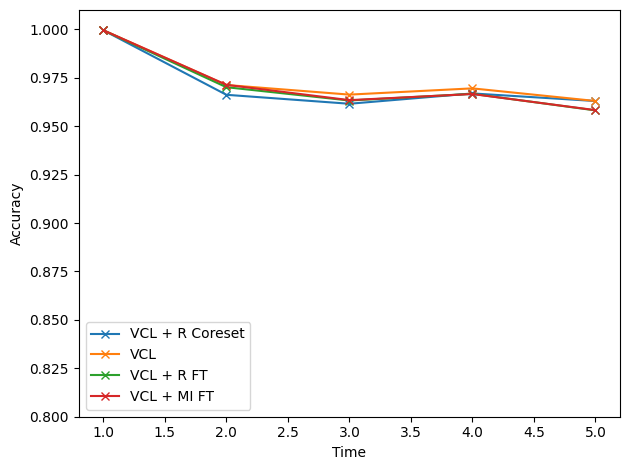

In [15]:
plot_average_acc([acc_random, acc_none, acc_ft_random, acc_ft_mi], 
                 labels=['VCL + R Coreset', 'VCL', 'VCL + R FT', 'VCL + MI FT'],
                save=True,
                 ylim=[0.8, 1.01],
                filename='images/splitMNIST/avgacc.pdf')

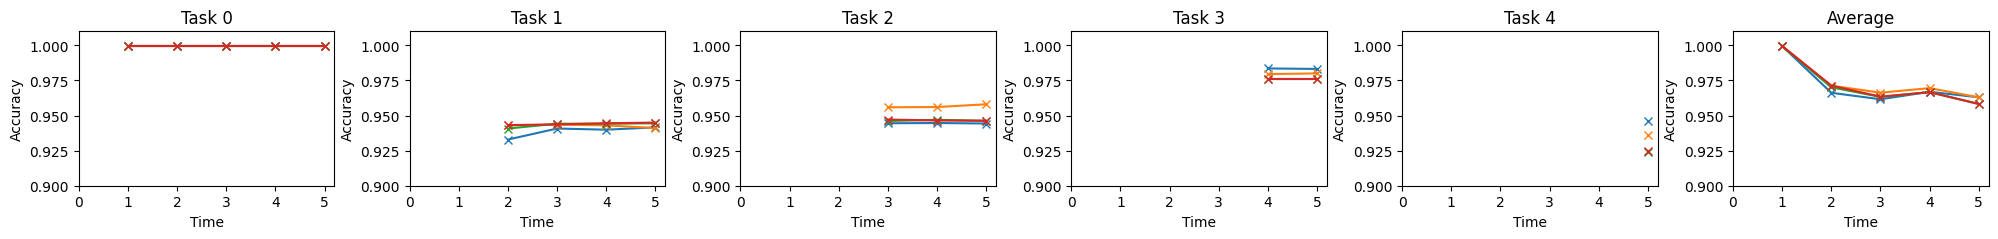

In [16]:
plot_task_acc([acc_random, acc_none, acc_ft_random, acc_ft_mi], 
                 labels=['VCL + R Coreset', 'VCL', 'VCL + R FT', 'VCL + MI FT'],
             save=True,
              ylim=[0.9, 1.01],
             filename='images/splitMNIST/acctask.pdf')

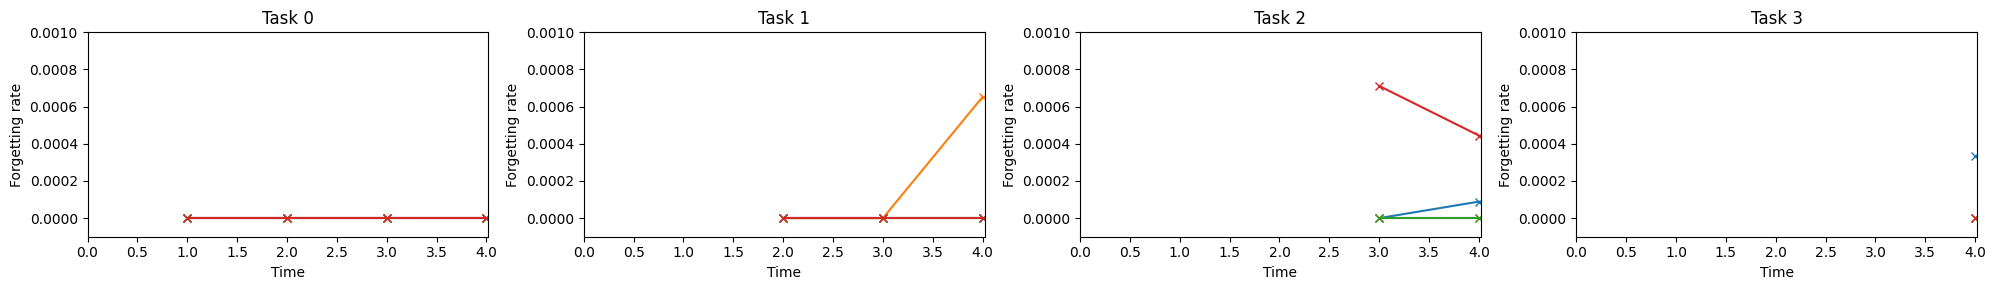

In [17]:
plot_forgetting([acc_random, acc_none, acc_ft_random, acc_ft_mi], 
                 labels=['VCL + R Coreset', 'VCL', 'VCL + R FT', 'VCL + MI FT'],
                ylim=[-0.0001, 0.001],
               save=True,
             filename='images/splitMNIST/forgetting.pdf')

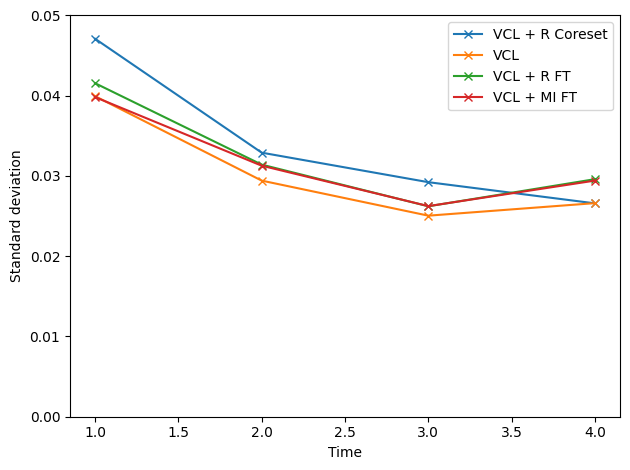

In [18]:
plot_variance([acc_random, acc_none, acc_ft_random, acc_ft_mi], 
                 labels=['VCL + R Coreset', 'VCL', 'VCL + R FT', 'VCL + MI FT'],
                save=True, 
              ylim=[0., 0.05],
                filename='images/splitMNIST/std.pdf')

### Split Fashion MNIST

In [19]:
acc_none1 = torch.load('results/splitFashionMNIST/experiment4/accuracies.pt')
acc_none2 = torch.load('results/splitFashionMNIST/experiment4/accuracies2.pt')
acc_none3 = torch.load('results/splitFashionMNIST/experiment4/accuracies3.pt')
acc_none = (acc_none1 + acc_none2 + acc_none3)/3

In [20]:
acc_random1 = torch.load('results/splitFashionMNIST/experiment5/accuracies.pt')
acc_random2 = torch.load('results/splitFashionMNIST/experiment5/accuracies2.pt')
acc_random3 = torch.load('results/splitFashionMNIST/experiment5/accuracies3.pt')
acc_random = (acc_random1 + acc_random2 + acc_random3)/3

In [21]:
acc_ft_random1 = torch.load('results/splitFashionMNIST/experiment8/acc_random1.pt')
acc_ft_random2 = torch.load('results/splitFashionMNIST/experiment8/acc_random2.pt')
acc_ft_random3 = torch.load('results/splitFashionMNIST/experiment8/acc_random3.pt')
acc_ft_random = (acc_ft_random1 + acc_ft_random2 + acc_ft_random3)/3

In [22]:
acc_ft_mi1 = torch.load('results/splitFashionMNIST/experiment8/acc_mi1.pt')
acc_ft_mi2 = torch.load('results/splitFashionMNIST/experiment8/acc_mi2.pt')
acc_ft_mi3 = torch.load('results/splitFashionMNIST/experiment8/acc_mi3.pt')
acc_ft_mi = (acc_ft_mi1 + acc_ft_mi2 + acc_ft_mi3)/3

In [23]:
acc_none[-1].mean(), acc_random[-1].mean(), acc_ft_mi[-1].mean(), acc_ft_random[-1].mean()

(tensor(0.9847), tensor(0.9849), tensor(0.9821), tensor(0.9821))

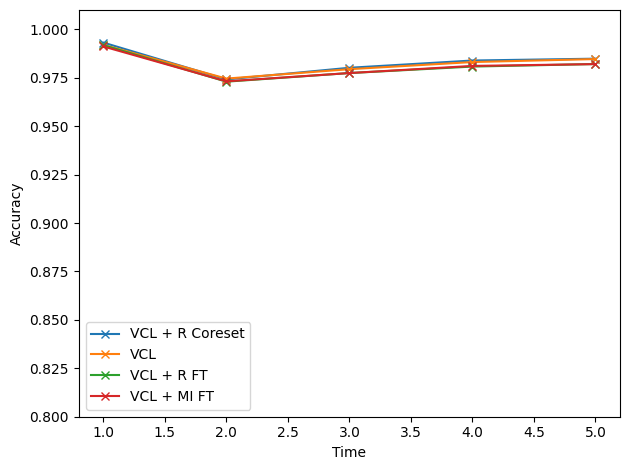

In [26]:
plot_average_acc([acc_random, acc_none, acc_ft_random, acc_ft_mi], 
                 labels=['VCL + R Coreset', 'VCL', 'VCL + R FT', 'VCL + MI FT'],
                save=True,
                 ylim=[0.8, 1.01],
                filename='images/splitFashionMNIST/avgacc.pdf')

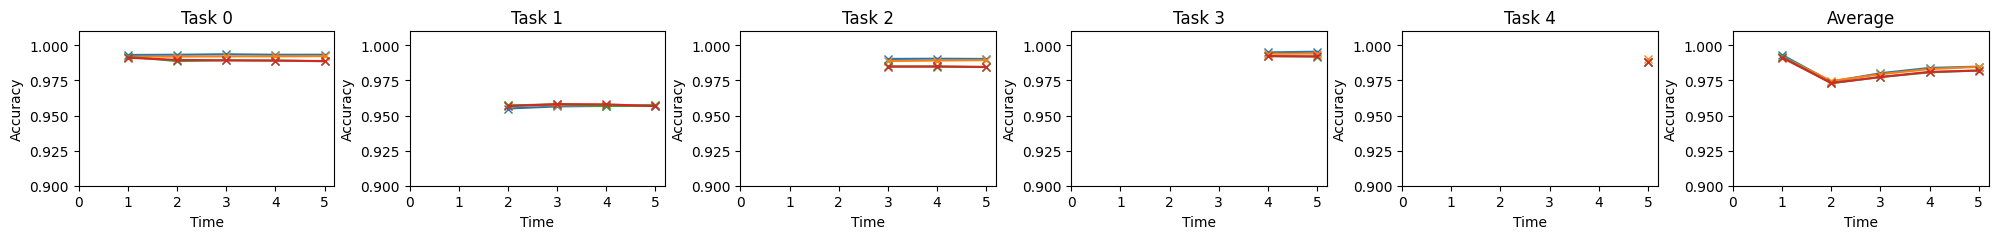

In [27]:
plot_task_acc([acc_random, acc_none, acc_ft_random, acc_ft_mi], 
                 labels=['VCL + R Coreset', 'VCL', 'VCL + R FT', 'VCL + MI FT'],
             save=True,
              ylim=[0.9, 1.01],
             filename='images/splitFashionMNIST/taskacc.pdf')

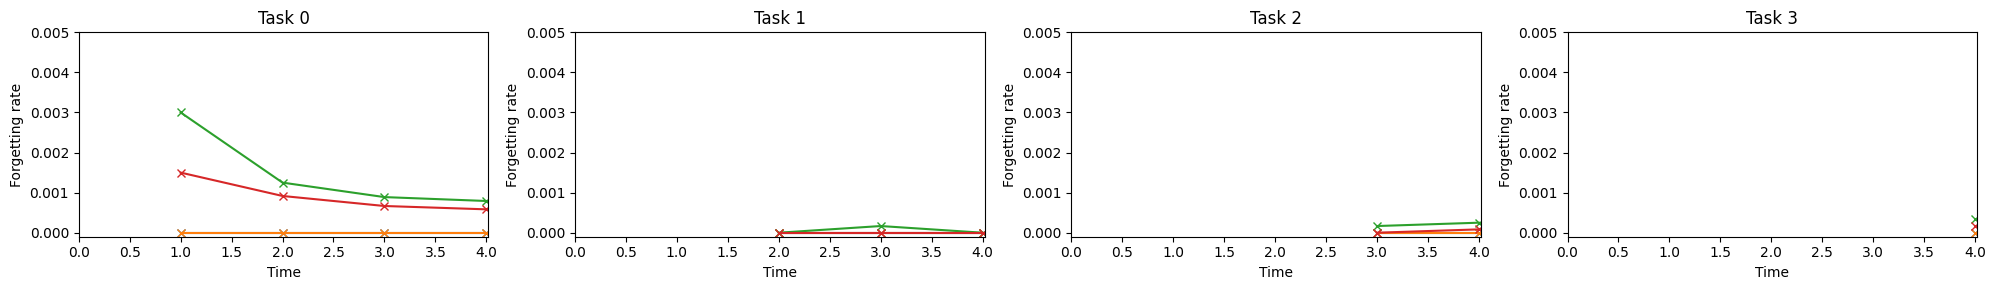

In [30]:
plot_forgetting([acc_random, acc_none, acc_ft_random, acc_ft_mi], 
                 labels=['VCL + R Coreset', 'VCL', 'VCL + R FT', 'VCL + MI FT'],
                ylim=[-0.0001, 0.005],
               save=True,
             filename='images/splitFashionMNIST/forgetting.pdf')

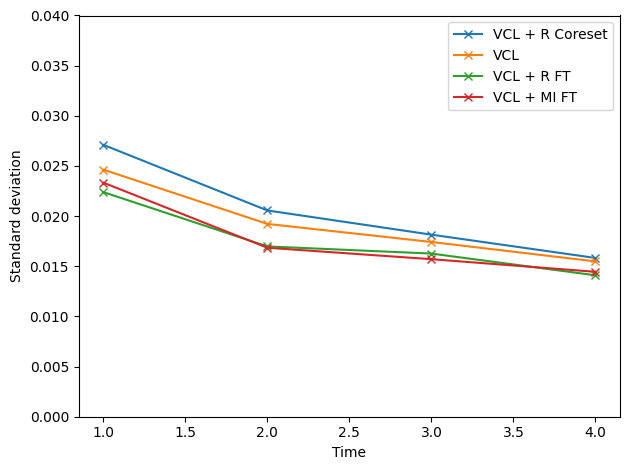

In [32]:
plot_variance([acc_random, acc_none, acc_ft_random, acc_ft_mi], 
                labels=['VCL + R Coreset', 'VCL', 'VCL + R FT', 'VCL + MI FT'],
              save=True, 
              ylim=[0., 0.04],
              filename='images/splitFashionMNIST/std.pdf')

### Permuted MNIST

In [131]:
acc_none = (torch.load('results/permutedMNIST/experiment1/accuracies2.pt') \
            + torch.load('results/permutedMNIST/experiment1/accuracies3.pt') \
            + torch.load('results/permutedMNIST/experiment1/accuracies4.pt'))/3
acc_random = (torch.load('results/permutedMNIST/experiment8/accuracies.pt') \
            + torch.load('results/permutedMNIST/experiment8/accuracies2.pt') \
            + torch.load('results/permutedMNIST/experiment8/accuracies3.pt'))/3
acc_ft_random = (torch.load('results/permutedMNIST/finetuning50/acc_random1.pt') \
            + torch.load('results/permutedMNIST/finetuning50/acc_random2.pt') \
            + torch.load('results/permutedMNIST/finetuning50/acc_random3.pt'))/3
acc_ft_mi = (torch.load('results/permutedMNIST/finetuning50/acc_mi_temp10.pt') \
            + torch.load('results/permutedMNIST/finetuning50/acc_mi_temp10_2.pt') \
            + torch.load('results/permutedMNIST/finetuning50/acc_mi_temp10_3.pt'))/3

In [82]:
acc_none[-1].mean(), acc_ft_random[-1].mean(), acc_random[-1].mean(), acc_ft_mi[-1].mean()

(tensor(0.8983), tensor(0.9085), tensor(0.9036), tensor(0.9090))

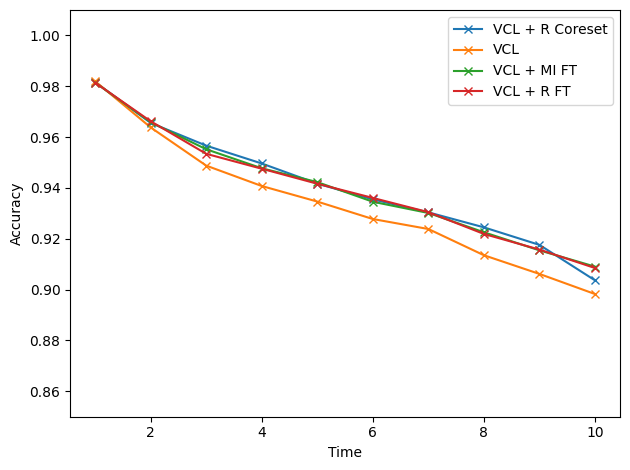

In [11]:
plot_average_acc([acc_random, acc_none, acc_ft_mi, acc_ft_random], 
                 labels=['VCL + R Coreset', 'VCL', 'VCL + MI FT', 'VCL + R FT'],
                save=True,
                 ylim=[0.85, 1.01],
                filename='images/permutedMNIST/avgacczoom.pdf')

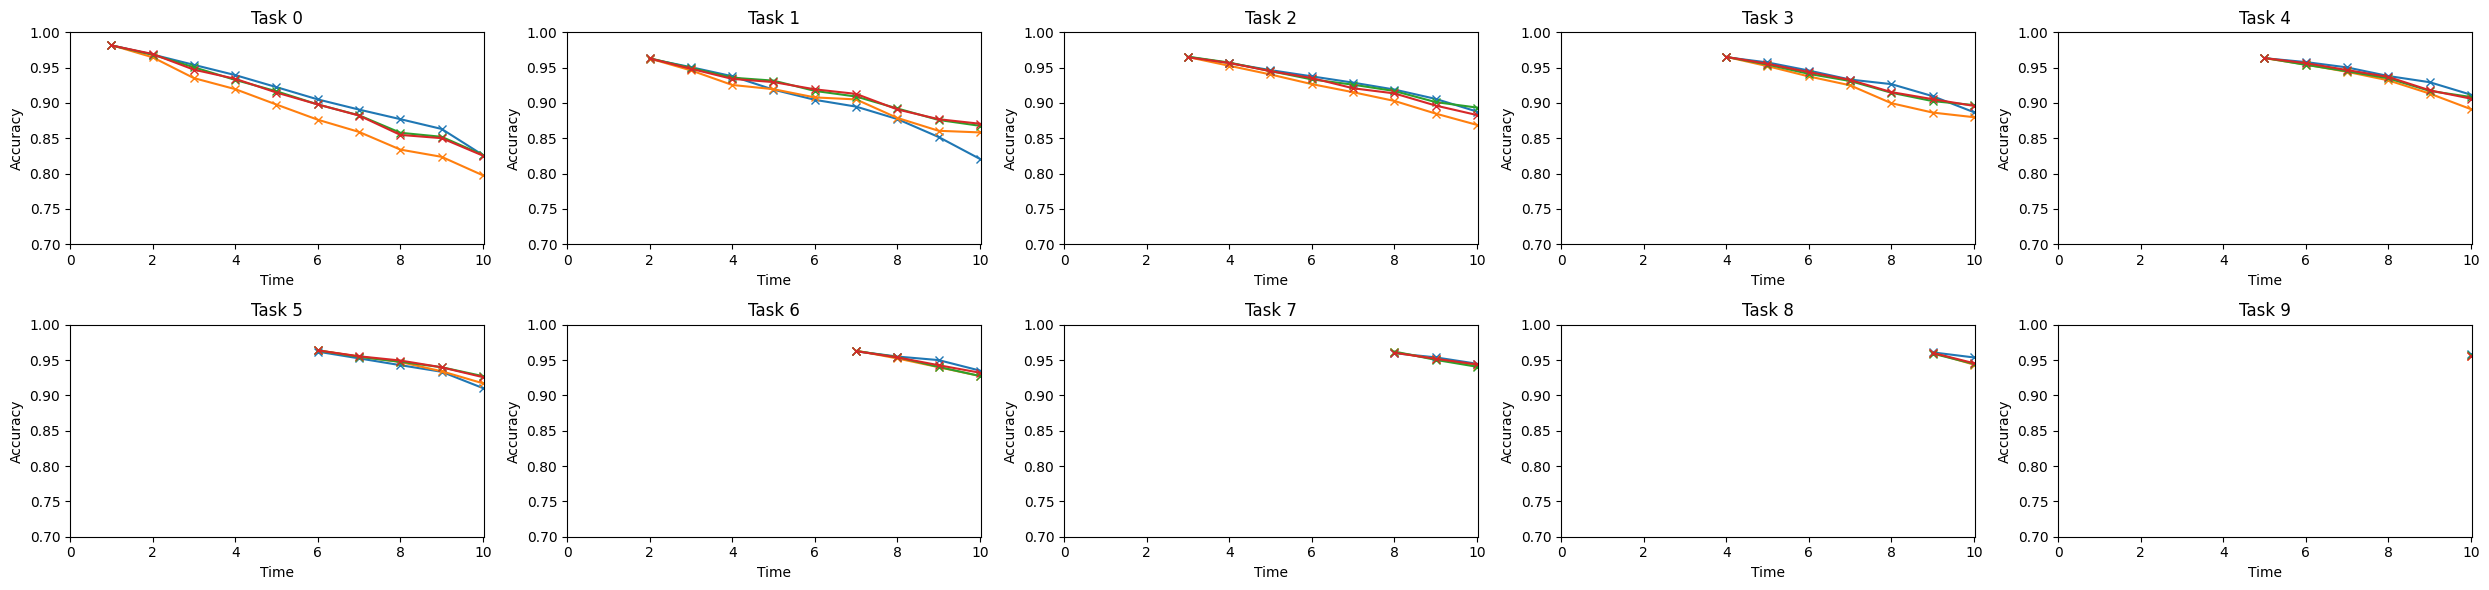

In [132]:
plot_alltasks([acc_random, acc_none, acc_ft_mi, acc_ft_random], 
                 labels=['VCL + R Coreset', 'VCL', 'VCL + MI FT', 'VCL + R FT'],
             save=True,
              ylim=[0.7, 1.],
              n=5,
             filename='images/permutedMNIST/taskacc.pdf')

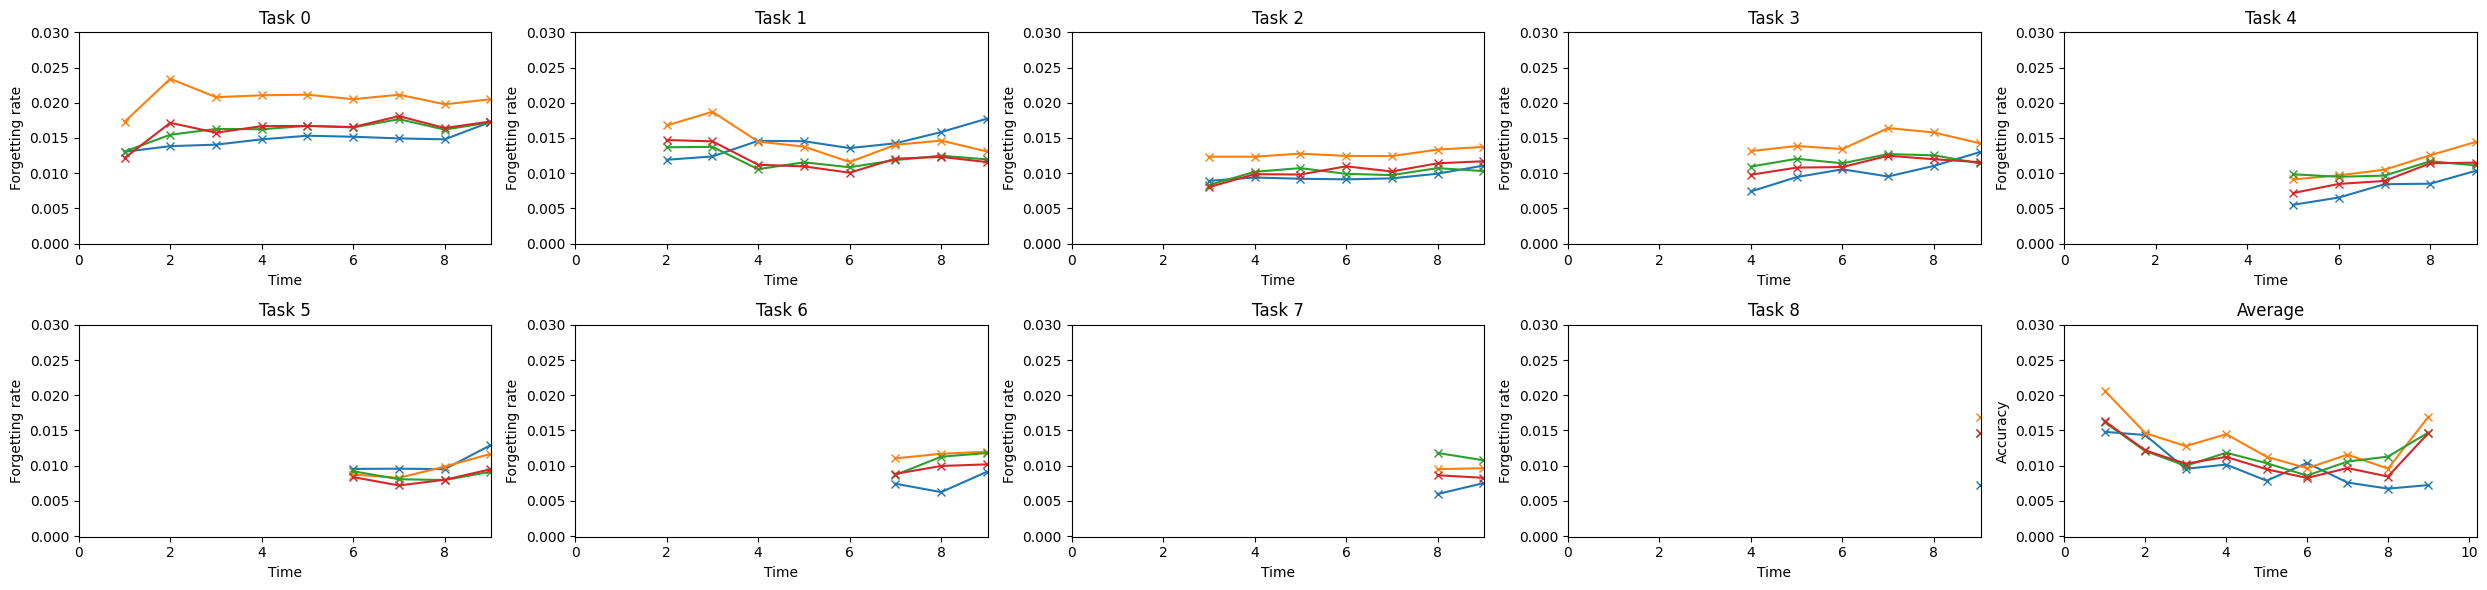

In [90]:
plot_forgetting([acc_random, acc_none, acc_ft_mi, acc_ft_random], 
                 labels=['VCL + R Coreset', 'VCL', 'VCL + MI FT', 'VCL + R FT'],
                ylim=[-0.0001, 0.03],
                save=True,
               n=5,
                filename='images/permutedMNIST/forgettingrate.pdf')

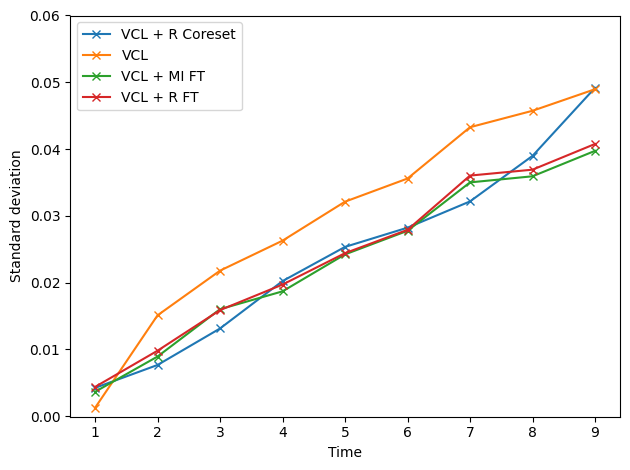

In [55]:
plot_variance([acc_random, acc_none, acc_ft_mi, acc_ft_random], 
                 labels=['VCL + R Coreset', 'VCL', 'VCL + MI FT', 'VCL + R FT'],
                ylim=[-0.0001, 0.06],
             save=True,
              filename='images/permutedMNIST/std.pdf')

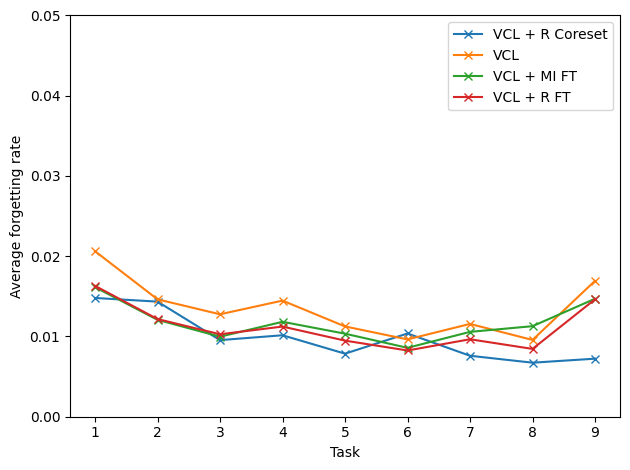

In [56]:
plot_average_forgetting([acc_random, acc_none, acc_ft_mi, acc_ft_random], 
                 labels=['VCL + R Coreset', 'VCL', 'VCL + MI FT', 'VCL + R FT'],
                save=True,
                 ylim=[0., 0.05],
                filename='images/permutedMNIST/avgforgettingrate.pdf')

### Permuted Fashion MNIST

In [122]:
acc_none1 = torch.load('results/permutedFashionMNIST/experiment5/acc_none1.pt')
acc_none2 = torch.load('results/permutedFashionMNIST/experiment5/acc_none2.pt')
acc_none3 = torch.load('results/permutedFashionMNIST/experiment6/acc_none3.pt')
acc_none = (acc_none1 + acc_none2 + acc_none3)/3

In [123]:
acc_random1 = torch.load('results/permutedFashionMNIST/experiment4/accuracies.pt')
acc_random2 = torch.load('results/permutedFashionMNIST/experiment4/accuracies2.pt')
acc_random3 = torch.load('results/permutedFashionMNIST/experiment4/accuracies3.pt')
acc_random = (acc_random1 + acc_random2 + acc_random3)/3

In [124]:
acc_ft_random1 = torch.load('results/permutedFashionMNIST/experiment5/acc_random1.pt')
acc_ft_random2 = torch.load('results/permutedFashionMNIST/experiment5/acc_random2.pt')
acc_ft_random3 = torch.load('results/permutedFashionMNIST/experiment6/acc_random3.pt')
acc_ft_random = (acc_ft_random1 + acc_ft_random2 + acc_ft_random3)/3

In [125]:
acc_ft_mi1 = torch.load('results/permutedFashionMNIST/experiment5/acc_mi1.pt')
acc_ft_mi2 = torch.load('results/permutedFashionMNIST/experiment5/acc_mi2.pt')
acc_ft_mi3 = torch.load('results/permutedFashionMNIST/experiment6/acc_mi3.pt')
acc_ft_mi = (acc_ft_mi1 + acc_ft_mi2 + acc_ft_mi3)/3

In [126]:
acc_none[-1].mean(), acc_ft_random[-1].mean(), acc_random[-1].mean(), acc_ft_mi[-1].mean()

(tensor(0.6724), tensor(0.7235), tensor(0.7307), tensor(0.7230))

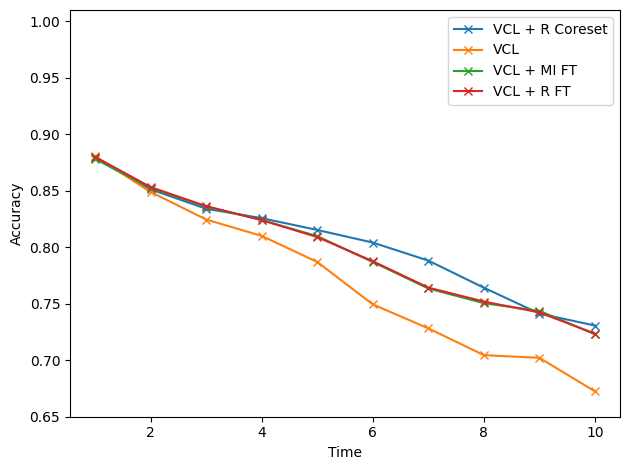

In [74]:
plot_average_acc([acc_random, acc_none, acc_ft_mi, acc_ft_random], 
                 labels=['VCL + R Coreset', 'VCL', 'VCL + MI FT', 'VCL + R FT'],
                 ylim=[0.65, 1.01],
                save=True,
                filename='images/permutedFashionMNIST/avgacczoom.pdf')

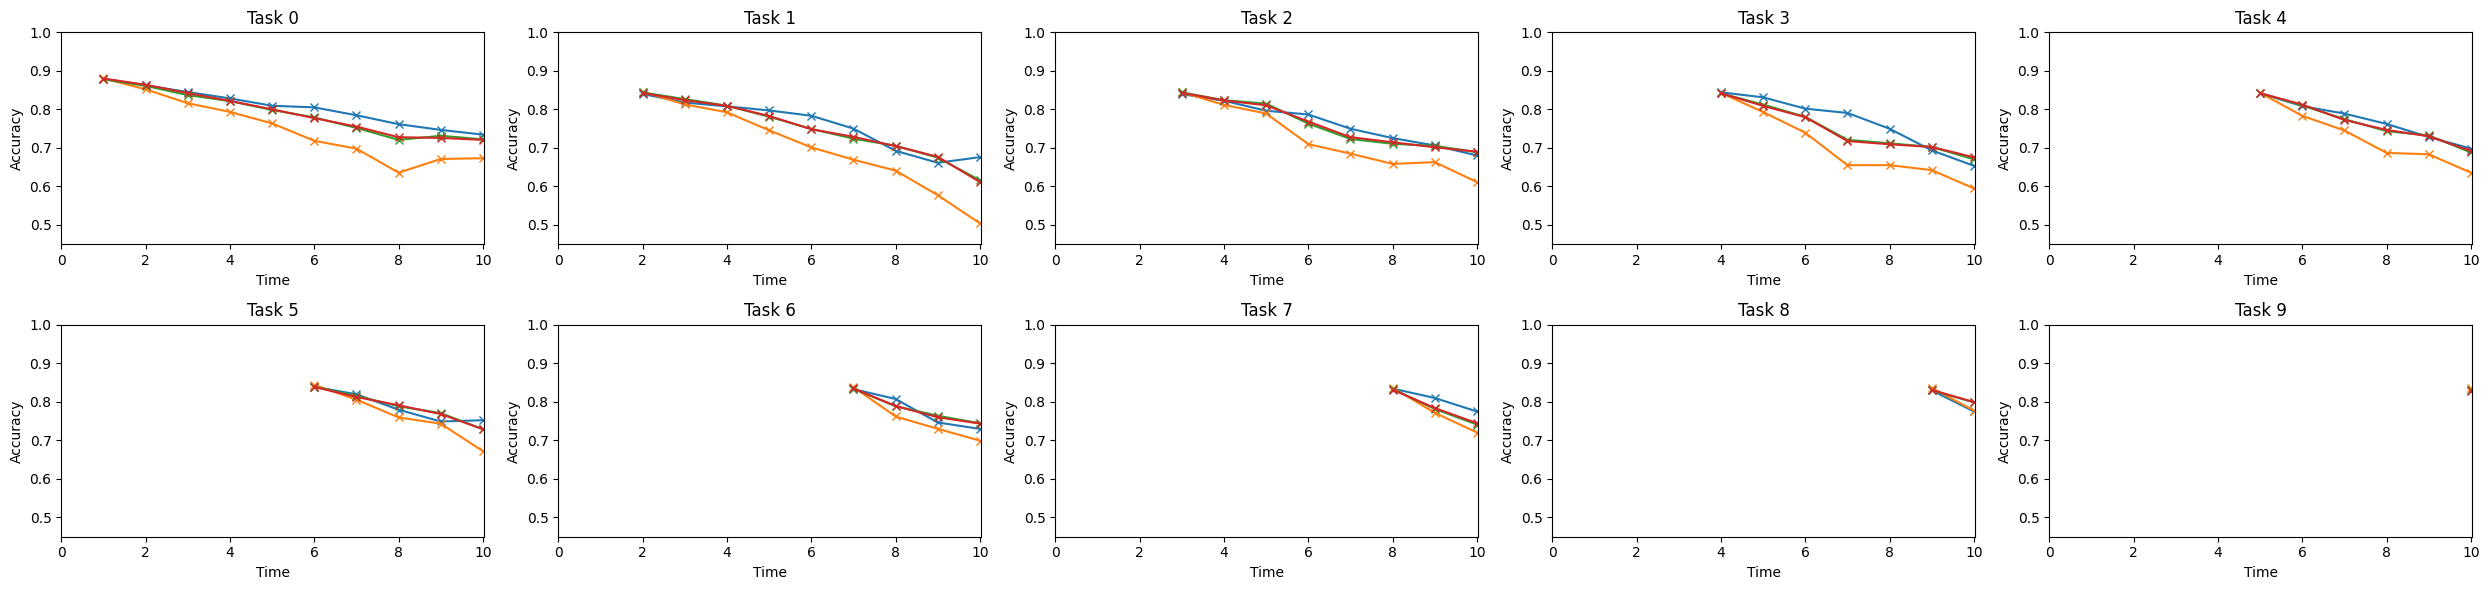

In [130]:
plot_alltasks([acc_random, acc_none, acc_ft_mi, acc_ft_random], 
                 labels=['VCL + R Coreset', 'VCL', 'VCL + MI FT', 'VCL + R FT'],
             save=True,
              ylim=[0.45, 1.],
              n=5,
             filename='images/permutedFashionMNIST/taskacc.pdf')

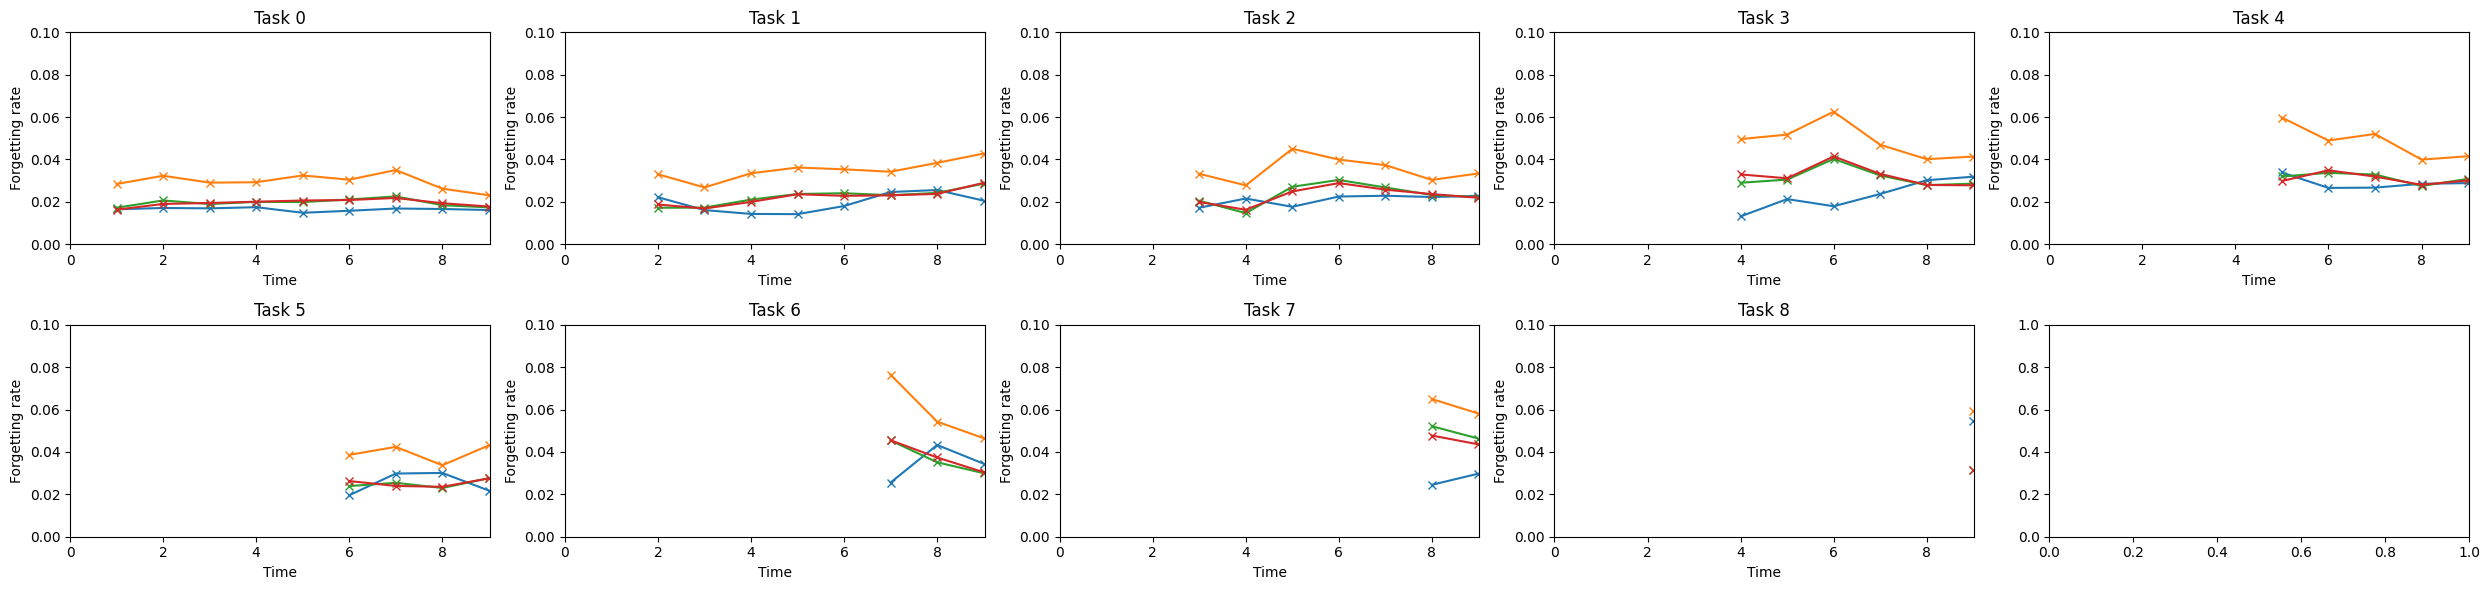

In [76]:
plot_forgetting([acc_random, acc_none, acc_ft_mi, acc_ft_random], 
                 labels=['VCL + R Coreset', 'VCL', 'VCL + MI FT', 'VCL + R FT'],
                ylim=[-0.0001, 0.1],
               save=True,
                n=5,
             filename='images/permutedFashionMNIST/forgetting.pdf')

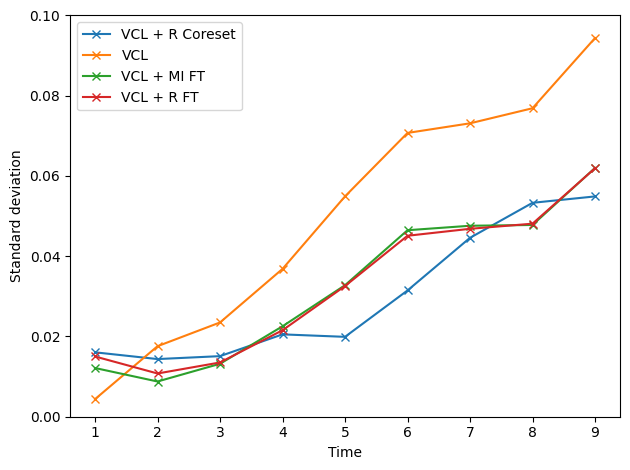

In [77]:
plot_variance([acc_random, acc_none, acc_ft_mi, acc_ft_random], 
                 labels=['VCL + R Coreset', 'VCL', 'VCL + MI FT', 'VCL + R FT'], 
              save=True, 
              filename='images/permutedFashionMNIST/std.pdf')

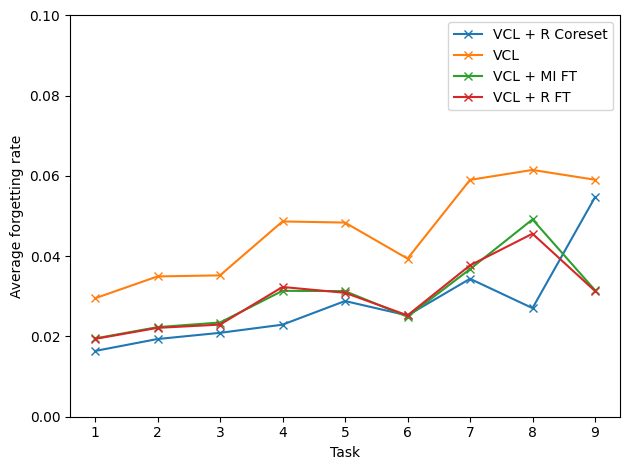

In [78]:
plot_average_forgetting([acc_random, acc_none, acc_ft_mi, acc_ft_random], 
                 labels=['VCL + R Coreset', 'VCL', 'VCL + MI FT', 'VCL + R FT'],
                ylim=[0., .1],
                 save=True,
                filename='images/permutedFashionMNIST/avgforgettingrate.pdf')